# Magic keywords

Magic keywords are special commands you can run in cells that let you control the notebook itself or perform system calls such as changing directories. For example, you can set up matplotlib to work interactively in the notebook with `%matplotlib`.

Magic commands are preceded with one or two percent signs (`%` or `%%`) for line magics and cell magics, respectively. Line magics apply only to the line the magic command is written on, while cell magics apply to the whole cell.

**NOTE:** These magic keywords are specific to the standard Python kernel. If you are using other kernels, these most likely won't work.

## Timing code
At some point, you'll probably spend some effort optimizing code to run faster. Timing how quickly your code runs is essential for this optimization. You can use the `timeit` magic command to time how long it takes for a function to run, like so:

In [2]:
from math import sqrt

def fibo(n): # Recursive Fibonacci number
    if n == 0:
        return 0
    elif n == 1:
        return 1
    return fibo(n - 1) + fibo(n - 2)

def fibo2(n): # Closed form
    return ((1 + sqrt(5))**n - (1 - sqrt(5))**n) / (2**n * sqrt(5))

In [3]:
%timeit fibo(20)

3.46 ms ± 73.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
%timeit fibo2(20)

864 ns ± 12.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


If you want to time how long it takes for a whole cell to run, you will use `%%timeit` like so:

In [5]:
import random

In [8]:
%%timeit

prize = 0
for _ in range(100):
    # roll a die
    roll = random.randint(1, 6)
    if roll % 2 == 0:
        prize += roll
    else:
        prize -= 1

135 µs ± 2.76 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%%timeit

rolls = (random.randint(1, 6) for _ in range(100))
prize = sum(roll if roll % 2 == 0 else -1 for roll in rolls)

128 µs ± 5.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Embedding visualizations in notebooks
As mentioned before, notebooks let you embed images along with text and code. This is most useful when you’re using `matplotlib` or other plotting packages to create visualizations. You can use `%matplotlib` to set up `matplotlib` for interactive use in the notebook. By default, figures will render in their window. However, you can pass arguments to the command to select a specific ["backend"](http://matplotlib.org/faq/usage_faq.html#what-is-a-backend), the software that renders the image. To render figures directly in the notebook, you should use the inline backend with the command `%matplotlib inline`.

> **Tip:** On higher resolution screens such as Retina displays, the default images in notebooks can look blurry. Use `%config InlineBackend.figure_format = 'retina'` after `%matplotlib inline` to render higher resolution images.

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

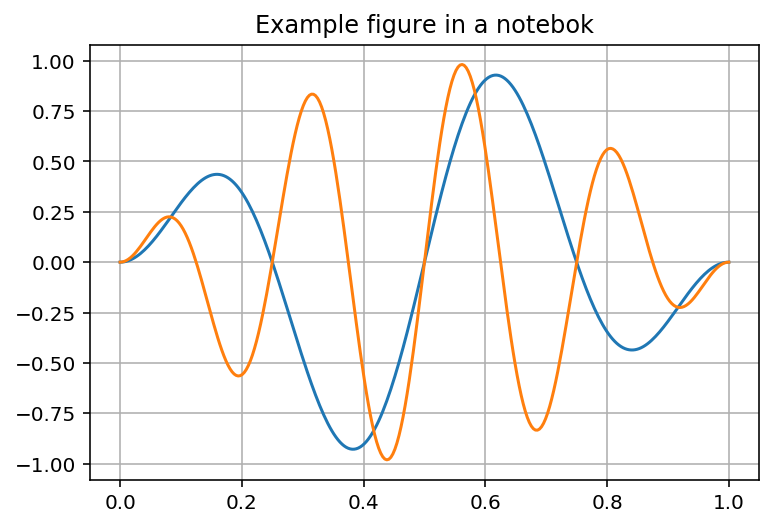

In [17]:
x = np.linspace(0, 1, 300)
for w in range(2, 6, 2):
    plt.plot(x, np.sin(np.pi * x) * np.sin(2 * w * np.pi * x))
plt.grid()
plt.title('Example figure in a notebok')
plt.show()

## Debugging in the Notebook

With the Python kernel, you can turn on the interactive debugger using the magic command `%pdb`. When you cause an error, you'll be able to inspect the variables in the current namespace.

In [18]:
%pdb

Automatic pdb calling has been turned ON


In [19]:
numbers = 'hello'
sum(numbers)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

> <ipython-input-19-62ac3a1676e0>(2)<module>()
      1 numbers = 'hello'
----> 2 sum(numbers)

ipdb> numbers
'hello'
ipdb> q


Above you can see I tried to sum up a string which gives an error. The debugger raises the error and provides a prompt for inspecting your code.

Read more about `pdb` in [the documentation](https://docs.python.org/3/library/pdb.html). To quit the debugger, enter `q` in the prompt.

## More reading
There are a whole bunch of other magic commands; I just touched on a few of the ones you'll use the most often. To learn more about them, [here's the list](http://ipython.readthedocs.io/en/stable/interactive/magics.html) of all available magic commands.